In [1]:
import pandas as pd


In [9]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


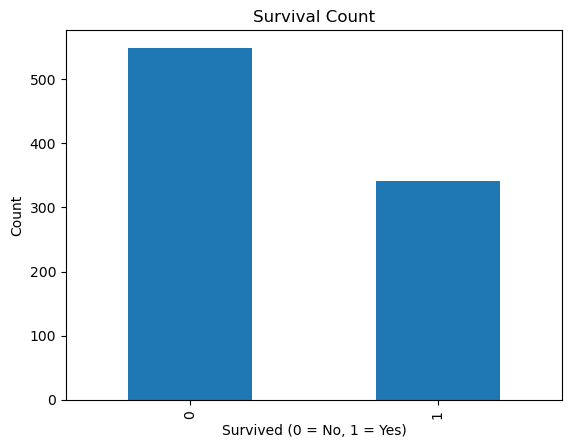

In [19]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count")
plt.show()


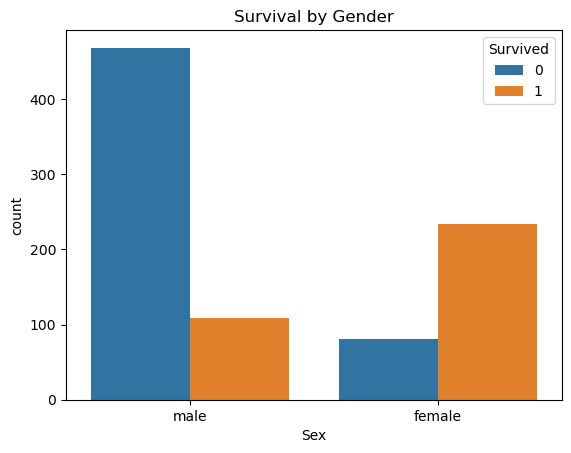

In [21]:
import seaborn as sns

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


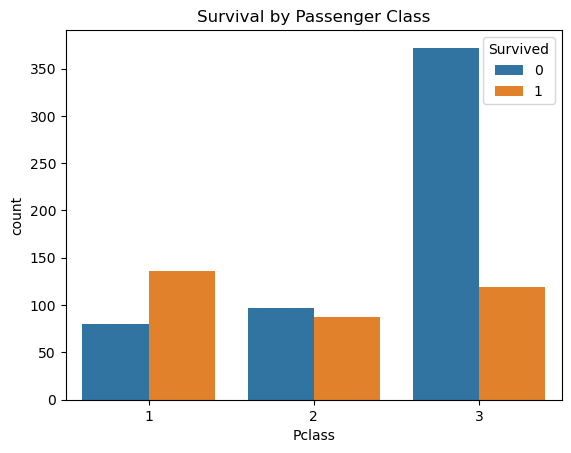

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


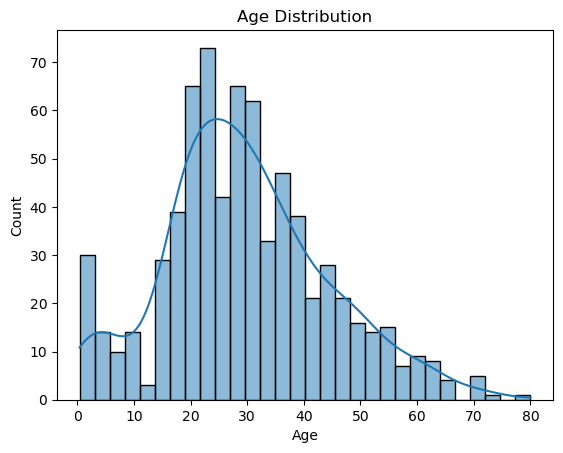

In [25]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


In [27]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [33]:
df.drop(columns=['Cabin'], inplace=True)



In [35]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [37]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [39]:
df.drop(columns=['Name', 'Ticket'], inplace=True)


In [41]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [43]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [45]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [47]:
df.drop(columns=['SibSp', 'Parch'], inplace=True)


In [49]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,0,22.0,7.2500,False,True,2,0
1,2,1,1,1,38.0,71.2833,False,False,2,0
2,3,1,3,1,26.0,7.9250,False,True,1,1
3,4,1,1,1,35.0,53.1000,False,True,2,0
4,5,0,3,0,35.0,8.0500,False,True,1,1


In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [55]:
X_train.shape, X_test.shape


((712, 9), (179, 9))

In [57]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [59]:
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8044692737430168

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[90, 15],
       [20, 54]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [69]:
dt_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)


0.7430167597765364

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [73]:
rf_pred = rf_model.predict(X_test)
accuracy_score(y_test, rf_pred)


0.8491620111731844

In [75]:
import joblib

# Save the trained model
joblib.dump(rf_model, "titanic_random_forest_model.pkl")


['titanic_random_forest_model.pkl']

In [77]:
loaded_model = joblib.load("titanic_random_forest_model.pkl")

# Test loaded model
loaded_model.predict(X_test[:5])


array([0, 0, 0, 1, 0], dtype=int64)